In [72]:
import cv2
import numpy as np
from skimage import data
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
import math
from skimage.metrics import structural_similarity
from matplotlib.colors import hsv_to_rgb as hsb2rgb

In [118]:
def plot_hsv(image_path):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 10))
    img = imread(image_path)
    ax0.imshow(rgb_to_hsv(img))
    ax0.set_title("My HSV Converter")
    ax0.axis('off')
    ax1.imshow(rgb2hsv(img))
    ax1.set_title("SK Image HSV converter")
    ax1.axis('off')

# Task 1

In [121]:
def rgb_to_hsv(image, return_hsv = False):
    eps = 1e-30
    image = image.astype('float')
    h,w,c = image.shape


    image = image/255
    img_r = image[:,:,0]
    img_g = image[:,:,1]
    img_b = image[:,:,2]
    C_min = np.argmin(image,axis=2)# h x w
    C_max = np.argmax(image,axis=2)

    C_min_vals = np.amin(image, axis=2)
    C_max_vals = np.amax(image, axis=2)


    delta = C_max_vals - C_min_vals + eps
    # print(delta)
    H = np.zeros((h,w), dtype='float')
    H[C_max == 0] = ((((img_g - img_b)/delta)%6)*60)[C_max == 0]
    H[C_max == 1] = ((((img_b - img_r)/delta)+2)*60)[C_max == 1]
    H[C_max == 2] = ((((img_r - img_g)/delta)+4)*60)[C_max == 2]
    H =  H/360


    V = C_max_vals

    S = np.zeros((h,w), dtype='float')
    S[C_max_vals != 0] = delta[C_max_vals != 0] / C_max_vals[C_max_vals != 0]
    S = np.clip(S, 0, 1)

    image_hsv = np.empty_like(image)
    image_hsv[..., 0] = H
    image_hsv[...,1] = V
    image_hsv[...,2] = S
    # image_hsv = np.concatenate((H[..., np.newaxis], S[...,np.newaxis], V[...,np.newaxis]), axis=-1)
    if return_hsv:
        return image_hsv, (H, S, V)
    return image_hsv


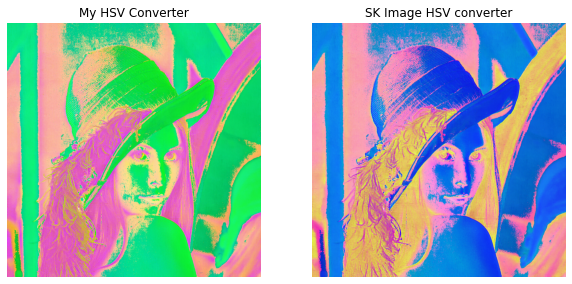

In [122]:
plot_hsv('Lenna.png')

# Task 2

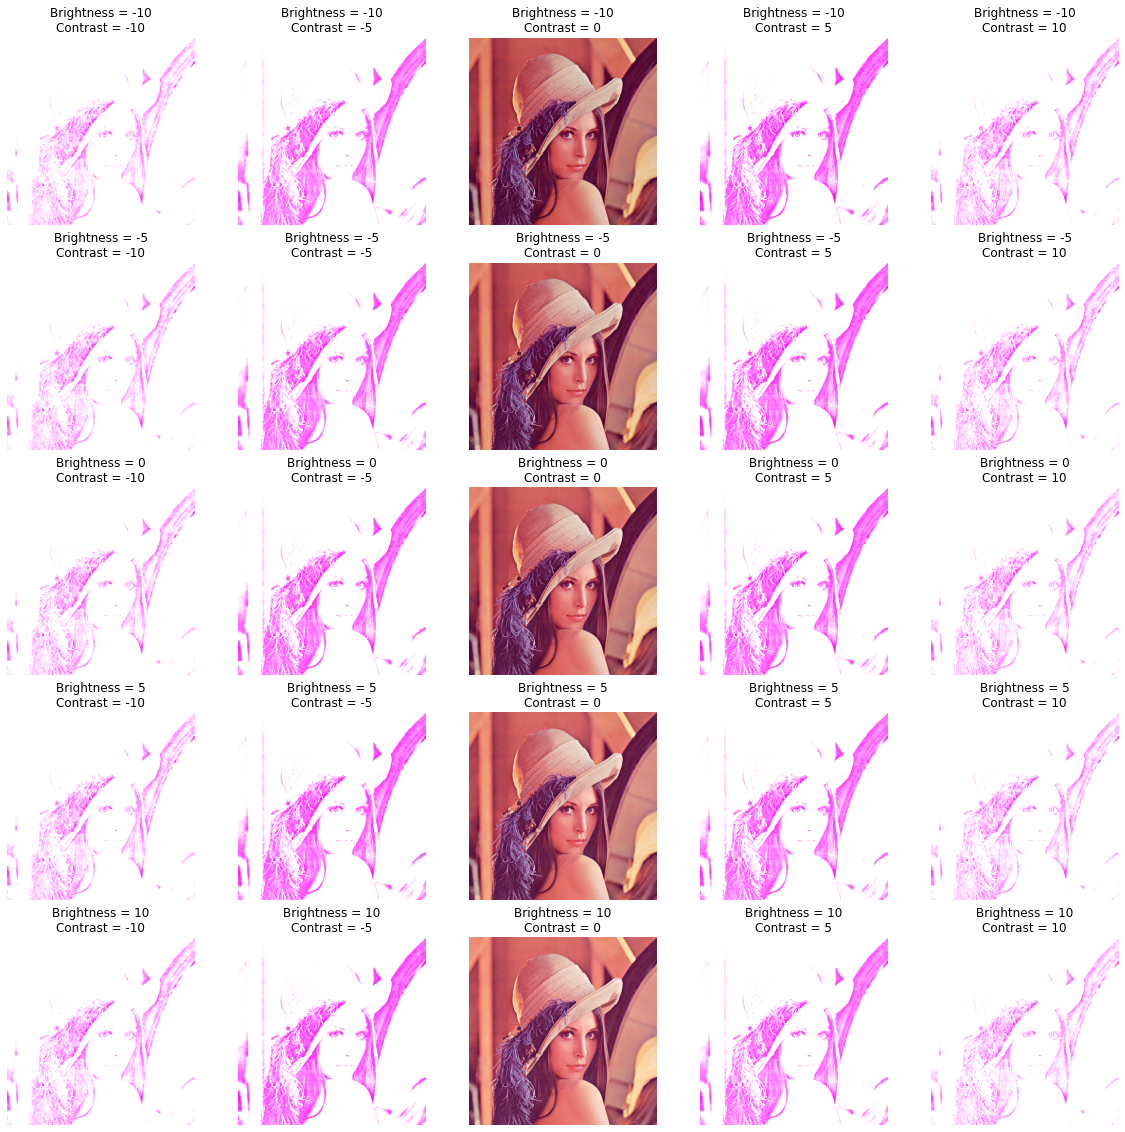

In [30]:
img = imread('Lenna.png')
brightness = range(-10, 11, 5)
contrast = range(-10, 11, 5)
fig , ax =  plt.subplots(ncols=5, nrows=5, figsize=(20, 20))

for i, b in enumerate(brightness):
    for j, c in enumerate(contrast):
        if c == 0: # daca contrastul este 0, atunci imaginea devine neagra, ceea ce nu ne dorim
             ax[i,j].imshow(cv2.convertScaleAbs(img, beta=b))
        else:
            ax[i,j].imshow(cv2.convertScaleAbs(img, alpha=c, beta=b))
        ax[i,j].set_title(f"Brightness = {b}\nContrast = {c}")
        ax[i,j].axis('off')

[Source](https://docs.opencv.org/4.5.3/d3/dc1/tutorial_basic_linear_transform.html)

# Task 3

In [21]:
img = imread("cat1.jpg")
# img = img[0:500, 0:500, :]
img_mean = cv2.medianBlur(img, 3)
img_gauss = cv2.GaussianBlur(img, (3,3), 0)
img_billat = cv2.bilateralFilter(img, 3, sigmaColor=75, sigmaSpace=75)
images = [img,img_mean ,img_gauss, img_billat]

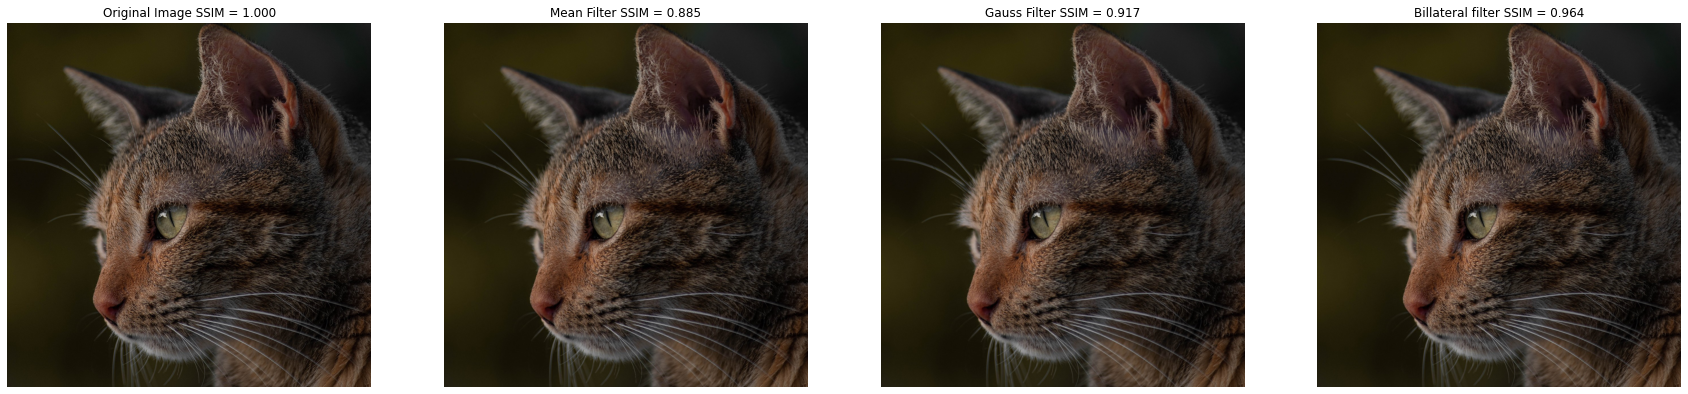

In [22]:
fig , ax =  plt.subplots(ncols=4, nrows=1, figsize=(30, 20))
titles = [
    "Original Image",
    "Mean Filter",
    "Gauss Filter",
    "Billateral filter",
]

for i, b in enumerate(images):
        ax[i].imshow(b)
        ax[i].set_title(f"{titles[i]} SSIM = {structural_similarity(img, b, multichannel=True, data_range=img.max() - img.min()):.3f}")
        ax[i].axis('off')

# Task 4

![Result](eye_detector.png)